# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

In [55]:
from sklearn.preprocessing import StandardScaler

#머신러닝 모델 구축 / 평가
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score
import matplotlib.font_manager as fm

#한글 폰트
plt.style.use('seaborn')
plt.rc('font', family='DejaVu Sans')
plt.rc('axes', unicode_minus=False)

In [5]:
data = pd.read_csv("assignment3_creditcard.csv")

In [6]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [7]:
data.shape

(28678, 29)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      28678 non-null  float64
 1   V2      28678 non-null  float64
 2   V3      28678 non-null  float64
 3   V4      28678 non-null  float64
 4   V5      28678 non-null  float64
 5   V6      28678 non-null  float64
 6   V7      28678 non-null  float64
 7   V8      28678 non-null  float64
 8   V9      28678 non-null  float64
 9   V10     28678 non-null  float64
 10  V11     28678 non-null  float64
 11  V12     28678 non-null  float64
 12  V13     28678 non-null  float64
 13  V14     28678 non-null  float64
 14  V15     28678 non-null  float64
 15  V16     28678 non-null  float64
 16  V17     28678 non-null  float64
 17  V18     28678 non-null  float64
 18  V19     28678 non-null  float64
 19  V20     28678 non-null  float64
 20  V21     28678 non-null  float64
 21  V22     28678 non-null  float64
 22

In [67]:
data['Class'].value_counts()

0    28432
1      246
Name: Class, dtype: int64

- class가 0인 데이터가 대부분임. 

In [14]:
data.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

- 결측치 없음

In [15]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535,0.008578
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736,0.092221
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915,0.000000
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189,0.000000
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075,0.000000
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911,0.000000
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133,1.000000


- 변수별로 값의 범위가 다르므로 정규화 필요

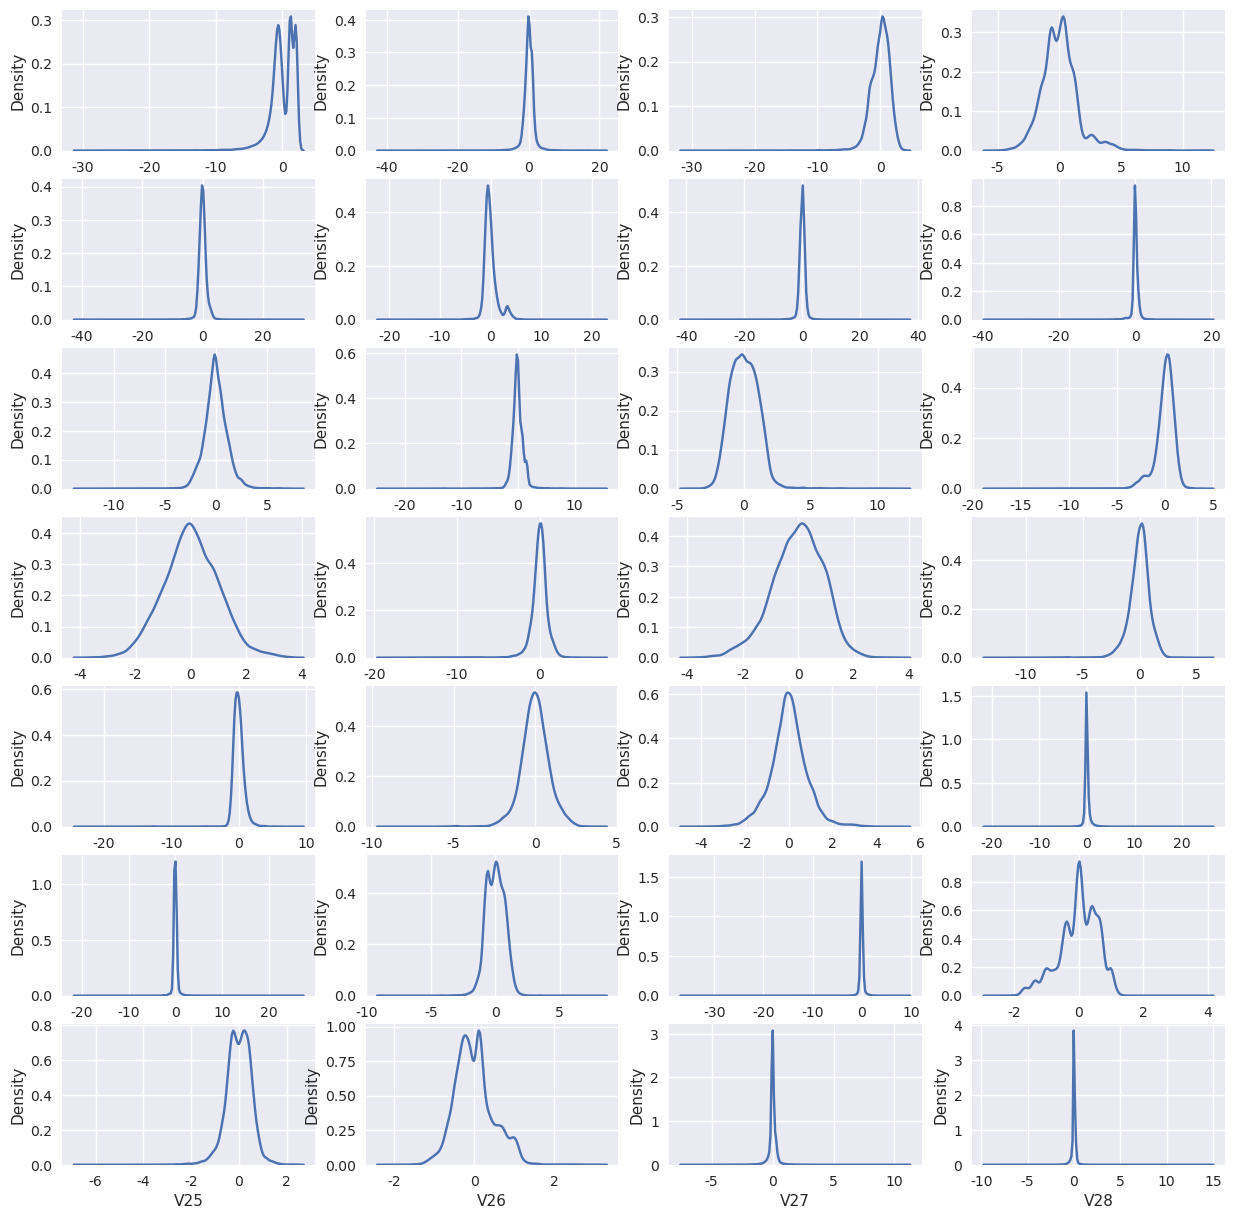

In [25]:
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(15, 15))

for i, col in enumerate(data.drop('Class', axis=1).columns):
    sns.kdeplot(data=data, palette='pastel', x=col, ax=ax[int(i/4),int(i%4)])

- 심하게 skewed 된 변수는 보이지 않으므로 로그변환은 하지 않아도 될 것으로 보임

### Data Preprocessing

In [79]:
#train / test set 분리
X = data.drop('Class', axis=1)
y = data[['Class']]
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.3,random_state=2021)

In [23]:
#칼럼 단위 정규화
normalizer=StandardScaler()
X_train=normalizer.fit_transform(X_train)
X_test=normalizer.transform(X_test)

### 로지스틱 회귀 모델 적합

In [29]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [32]:
#칼럼에 따른 beta, exp(beta) 확인
column_name=["const"]+X.columns.tolist()
beta=np.concatenate([model.intercept_, model.coef_.reshape(-1)]).round(2)
odds=np.exp(beta).round(2)
interpret=np.where(beta>0,"fraud","others")

#beta 해석
beta_analysis=pd.DataFrame(np.c_[beta,odds,interpret],index=column_name,columns=["beta","exp(beta)","interprt"])
beta_analysis

,beta,exp(beta),interprt
const,-7.6,0.0,others
V1,0.18,1.2,fraud
V2,-0.14,0.87,others
V3,0.05,1.05,fraud
V4,1.2,3.32,fraud
V5,-0.1,0.9,others
V6,-0.26,0.77,others
V7,-0.11,0.9,others
V8,-0.33,0.72,others
V9,-0.07,0.93,others


### test data 예측

In [34]:
model.predict_proba(X_test)

array([[9.99656059e-01, 3.43941352e-04],
       [9.98443582e-01, 1.55641780e-03],
       [9.96179306e-01, 3.82069404e-03],
       ...,
       [9.99622448e-01, 3.77552091e-04],
       [9.99319792e-01, 6.80208288e-04],
       [9.96094779e-01, 3.90522078e-03]])

In [39]:
P_1 = model.predict_proba(X_test)[:, 1]

In [57]:
# class 예측
y_pred = model.predict(X_test) 
y_pred[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [40]:
Cut_off=np.linspace(0.01,0.99,10) #cut off 값 만들기
for cutoff in Cut_off:
    y_pred=np.where(P_1.reshape(-1)>=cutoff,1,0)   # class가 1일 logit 값이 cutoff 보다 크면 1(사기), 아니면 0(사기 X)
    acc=accuracy_score(y_true=y_test,y_pred=y_pred) #정확도
    recall=recall_score(y_true=y_test,y_pred=y_pred) #민감도
    precision=precision_score(y_true=y_test,y_pred=y_pred) #정밀도
    
    print(f"정확도 : {acc : 0.2f}",f"민감도 : {recall : 0.2f}",f"정밀도 : {precision : 0.2f}",f"cut off : {cutoff : 0.2f}")

정확도 :  0.98 민감도 :  0.92 정밀도 :  0.28 cut off :  0.01
정확도 :  1.00 민감도 :  0.87 정밀도 :  0.88 cut off :  0.12
정확도 :  1.00 민감도 :  0.86 정밀도 :  0.93 cut off :  0.23
정확도 :  1.00 민감도 :  0.84 정밀도 :  0.93 cut off :  0.34
정확도 :  1.00 민감도 :  0.84 정밀도 :  0.95 cut off :  0.45
정확도 :  1.00 민감도 :  0.84 정밀도 :  0.96 cut off :  0.55
정확도 :  1.00 민감도 :  0.84 정밀도 :  0.97 cut off :  0.66
정확도 :  1.00 민감도 :  0.80 정밀도 :  0.97 cut off :  0.77
정확도 :  1.00 민감도 :  0.78 정밀도 :  0.97 cut off :  0.88
정확도 :  1.00 민감도 :  0.70 정밀도 :  0.97 cut off :  0.99


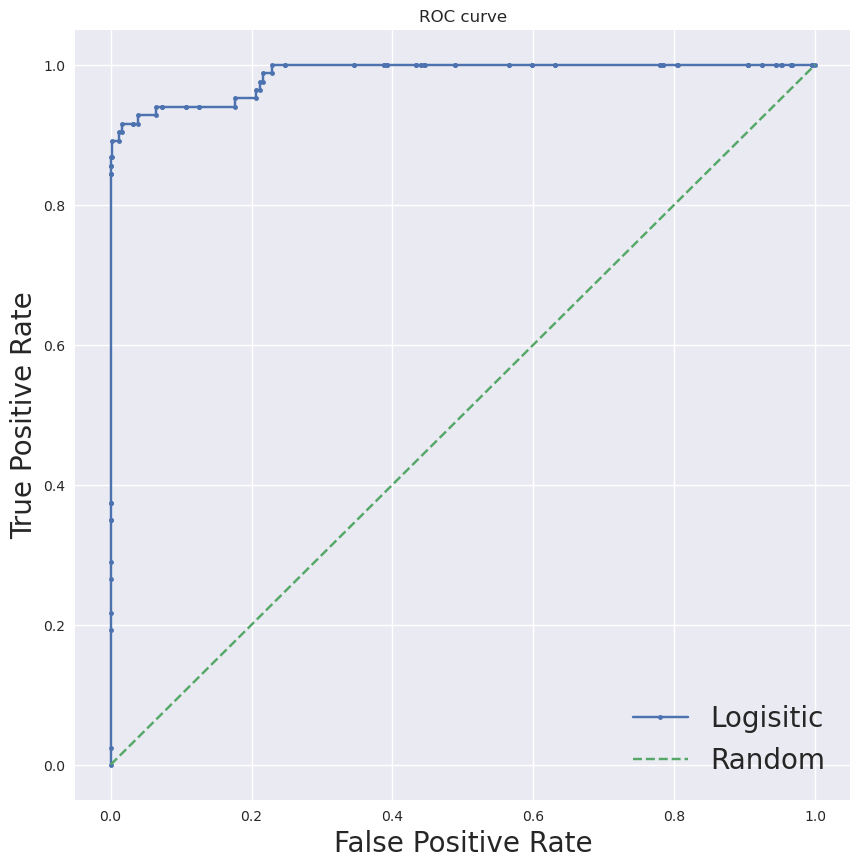

In [41]:
#X_test에 대해 y=1(사기)일 확률
probs=model.predict_proba(X_test)[:,1]

#ROC curve x축, y축
model_fpr, model_tpr, threshold1=roc_curve(y_test,probs)

#random은 사기 여부를 랜덤하게 판정한 것
random_fpr,random_tpr, threshold2=roc_curve(y_test,[0 for i in range(X_test.__len__())])

#plot
plt.figure(figsize=(10,10))
plt.plot(model_fpr,model_tpr,marker=".",label="Logisitic")
plt.plot(random_fpr,random_tpr,linestyle="--",label="Random")

#axis
plt.xlabel("False Positive Rate",size=20)
plt.ylabel("True Positive Rate",size=20)

#show the legend
plt.legend(fontsize=20)

plt.title("ROC curve")
plt.show()

In [56]:
roc_auc_score(y_test, y_pred)

0.9215107113113881

- AUC가 0.92로 성능이 좋은 편인 것으로 보인다.

#### 성능 지표

In [61]:
# accuracy score
accuracy_score(y_test, y_pred)

0.99814039981404

In [59]:
# recall score
recall_score(y_test, y_pred)

0.8433734939759037

In [60]:
# precision score
precision_score(y_test, y_pred)

0.958904109589041

In [53]:
# f1 score
f1_score(y_test, y_pred)

0.8974358974358975

### confusion matrix

In [58]:
confusion_matrix(y_test, y_pred)

array([[8518,    3],
       [  13,   70]], dtype=int64)

tp = 8518  
fp = 3  
fn = 13  
tn = 70

### Feature Selection으로 성능 개선

In [80]:
from sklearn.feature_selection import SelectFromModel, SelectKBest, mutual_info_classif

select = SelectKBest(mutual_info_classif, k=20)
select.fit(X_train, y_train)

SelectKBest(k=20,
            score_func=<function mutual_info_classif at 0x000001DEEFC22C00>)

In [81]:
selected = X.columns[select.get_support()]
selected

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'V27', 'V28'],
      dtype='object')

In [82]:
X_selected = data[selected]
X_train2,X_test2,y_train2,y_test2=train_test_split(X_selected, y,test_size=0.3,random_state=2021)

In [83]:
# 칼럼 단위 정규화
normalizer=StandardScaler()
X_train2=normalizer.fit_transform(X_train2)
X_test2=normalizer.transform(X_test2)

In [84]:
model2=LogisticRegression()
model2.fit(X_train2,y_train2)

LogisticRegression()

In [85]:
y_pred2 = model2.predict(X_test2) 
y_pred2[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [86]:
roc_auc_score(y_test2, y_pred2)

0.9275348076969303

In [87]:
confusion_matrix(y_test2, y_pred2)

array([[8518,    3],
       [  12,   71]], dtype=int64)

In [88]:
# f1 score
f1_score(y_test2, y_pred2)

0.9044585987261146

- 클래스가 대부분 0으로 편향된 데이터여서 성능 지표로 AUC와 f1 score를 사용하였고 설명변수를 20개만 선택해 로지스틱 회귀 모델에 적합한 결과 근소한 차이이기는 하나 성능이 증가하였음. 